In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [6]:
# Load in spreadsheet of results of our original run
rfile = './results.csv'
results = np.loadtxt(rfile, dtype=str, delimiter=',', skiprows=5, max_rows=13, unpack=True)
fasym = results[0].astype(float)
# boundings
N1_bound = results[1].astype(float)[0]
N25_bound = results[7].astype(float)[0]
N50_bound = results[13].astype(float)[0]
N100_bound = results[19].astype(float)[0]
N200_bound = results[25].astype(float)[0]
N500_bound = results[31].astype(float)[0]
N1k_bound = results[37].astype(float)[0]
N2k_bound = results[43].astype(float)[0]
N10k_bound = results[49].astype(float)[0]
bounds = np.array([N1_bound, N25_bound, N50_bound, N100_bound, N200_bound,
                  N500_bound, N1k_bound, N2k_bound, N10k_bound])
# fit t0 differences [minutes]
N1_tdiff = results[2].astype(float)
N25_tdiff = results[8].astype(float)
N50_tdiff = results[14].astype(float)
N100_tdiff = results[20].astype(float)
N200_tdiff = results[26].astype(float)
N500_tdiff = results[32].astype(float)
N1k_tdiff = results[38].astype(float)
N2k_tdiff = results[44].astype(float)
N10k_tdiff = results[50].astype(float)

In [24]:
# load in result npz for LD scenario A (should be same as above)
resA = np.load('output_arrays/synth_scatter50_ahead10000LDscenAkeyoutputs.npz')
fasymA, tdiffA_s, tdifferrA_s = resA['fasyms'], resA['tdiff_seconds'], resA['tdiff_err_seconds']
u1A, u2A = 0.1777 , 0.2952

resB = np.load('output_arrays/synth_scatter50_ahead10000LDscenBkeyoutputs.npz')
fasymB, tdiffB_s, tdifferrB_s = resB['fasyms'], resB['tdiff_seconds'], resB['tdiff_err_seconds']
u1B, u2B = 0.25, 0.45

resC = np.load('output_arrays/synth_scatter50_ahead10000LDscenCkeyoutputs.npz')
fasymC, tdiffC_s, tdifferrC_s = resC['fasyms'], resC['tdiff_seconds'], resC['tdiff_err_seconds']
u1C, u2C = 0.6, 0.2952

# np.savez(output_arr_name,
#         fasyms=fasym_arr,
#         tdiff_seconds=t0_diff_seconds_arr, tdiff_err_seconds=t0_diff_seconds_err_arr,
#         chi2red_homog=chi2red_homog_arr, chi2red_asym=chi2red_asym_arr)

In [34]:
linfitA = linregress(fasymA, tdiffA_s)
slopeA, slope_errA = linfitA.slope, linfitA.stderr
intcptA, intcpt_errA = linfitA.intercept, linfitA.intercept_stderr

linfitB = linregress(fasymB, tdiffB_s)
slopeB, slope_errB = linfitB.slope, linfitB.stderr
intcptB, intcpt_errB = linfitB.intercept, linfitB.intercept_stderr

linfitC = linregress(fasymC, tdiffC_s)
slopeC, slope_errC = linfitC.slope, linfitC.stderr
intcptC, intcpt_errC = linfitC.intercept, linfitC.intercept_stderr


In [22]:
# ## plotting the original results, for reference

# fig, ax = plt.subplots(figsize=(8,5))

# #ax.plot(fasym, N1_tdiff*60., marker='o', c='tab:blue', label=str(N1_bound)+' min bound')
# #ax.plot(fasym, N25_tdiff*60., marker='o', c='tab:orange', label=str(N25_bound)+' min bound')
# ax.plot(fasym, N50_tdiff*60., marker='o', c='tab:green', label=str(N50_bound)+' min bound')
# #ax.plot(fasym, N100_tdiff, marker='o', c='tab:red', label=str(N100_bound)+' min bound')
# ax.plot(fasym, N200_tdiff*60., marker='o', c='tab:purple', label=str(N200_bound)+' min bound')
# ax.plot(fasym, N500_tdiff*60., marker='o', c='tab:brown', label=str(N500_bound)+' min bound')
# ax.plot(fasym, N1k_tdiff*60., marker='o', c='tab:pink', label=str(N1k_bound)+' min bound')
# ax.plot(fasym, N2k_tdiff*60., marker='o', c='tab:gray', label=str(N2k_bound)+' min bound')
# ax.plot(fasym, N10k_tdiff*60., marker='o', c='tab:olive', label=str(N10k_bound)+' min bound')

# # attempting to fit the olive line with a linear function
# # dt = slope * dRp + intcpt
# linfit_info = linregress(fasym, N10k_tdiff)
# slope, slope_err = linfit_info.slope, linfit_info.stderr
# intcpt, intcpt_err = linfit_info.intercept, linfit_info.intercept_stderr
# x_fit = np.linspace(1,50, 100)
# y_fit = slope*x_fit + intcpt
# ax.plot(x_fit, y_fit*60., c='black', ls='--', label='Linear Fit')
# print('polyfit line of y = p1 * x + p0')
# print('slope p1 = %.4f +/- %.4f'%(slope, slope_err))
# print('intercept p0 = %.3f +/- %.3f'%(intcpt, intcpt_err))
# print('R = %.3f'%(linfit_info.rvalue))

# ax.set(ylim=(0, -120.))
# ax.set(xlabel=r'Intrinsic $\Delta R_p$ [scale heights]', ylabel=r'$\Delta t_0$ for best fit homog. limb model [s]')
# ax.legend(loc='upper left', fontsize=8)
# plt.show()

linear regression results:
slopes: 
scen. A = -2.387 +/- 0.015
scen. B = -2.388 +/- 0.016
scen. C = -2.383 +/- 0.016
intercepts: 
scen. A = -0.020 +/- 0.406
scen. B = -0.143 +/- 0.436
scen. C = -0.503 +/- 0.443


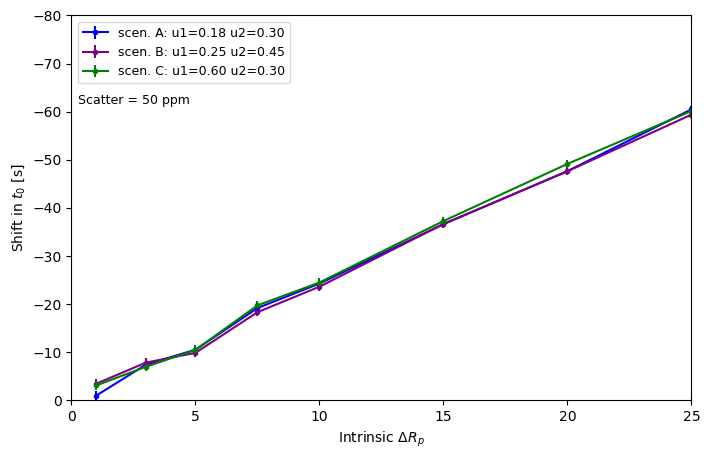

In [38]:
print('linear regression results:')
print('slopes: ')
print('scen. A = %.3f +/- %.3f'%(slopeA, slope_errA))
print('scen. B = %.3f +/- %.3f'%(slopeB, slope_errB))
print('scen. C = %.3f +/- %.3f'%(slopeC, slope_errC))
print('intercepts: ')
print('scen. A = %.3f +/- %.3f'%(intcptA, intcpt_errA))
print('scen. B = %.3f +/- %.3f'%(intcptB, intcpt_errB))
print('scen. C = %.3f +/- %.3f'%(intcptC, intcpt_errC))

## plotting the different LD scenarios
fig, ax = plt.subplots(figsize=(8,5))
# the original results:
#ax.plot(fasym, N10k_tdiff*60., marker='o', c='tab:olive', label='orig.')
# LD scenario A (should match original results)
ax.errorbar(fasymA, tdiffA_s, tdifferrA_s, ls='solid', marker='o', ms=3, c='blue', label='scen. A: u1=%.2f u2=%.2f'%(u1A, u2A))
# LD scenario B
ax.errorbar(fasymB, tdiffB_s, tdifferrB_s, ls='solid', marker='o', ms=3, c='purple', label='scen. B: u1=%.2f u2=%.2f'%(u1B, u2B))
# LD scenario C
ax.errorbar(fasymC, tdiffC_s, tdifferrC_s, ls='solid', marker='o', ms=3, c='green', label='scen. C: u1=%.2f u2=%.2f'%(u1C, u2C))

ax.text(0.01, 0.77, 'Scatter = 50 ppm', fontsize=9, transform=ax.transAxes)

ax.set(ylim=(0., -80.))
ax.set(xlim=(0, 25))
ax.set(xlabel=r'Intrinsic $\Delta R_p$', ylabel=r'Shift in $t_0$ [s]')
ax.legend(loc='upper left', fontsize=9)
plt.show()

Based on these quick tests, changing only the limb darkening coefficients with all else fixed the same doesn't seem to change this relation. 

For a given *true* asymmetry in the planet's lightcurve, given by the position along the x-axis, the corresponding y-value tells you the shift in transit centre time that, given to an otherwise identical transit model with uniform limbs, can equally fit the data with the specified photometric scatter. 

Therefore, the observer's interpretation is as follows: Let's call the observation in which you seek to measure limb asymmetries the "future" transit. If you know the future transit centre time to some value $y = \sigma_t$, then the x-value corresponding to this y-value is the minimum degree of asymmetry that you could distinguish from the time-shifting case. 

In [58]:
## so if I have a N scale height asymmetry, what precision would I need?
def precision_needed(fasym):
    time_min = slope*fasym + intcpt
    return abs(time_min*60.)

fasym_desired = 2.0
print('To resolve an asymmetry of %.2f scale heights'%(fasym_desired))
print('you need %.1f second precision on t0'%(precision_needed(fasym_desired)))

To resolve an asymmetry of 2.00 scale heights
you need 4.9 second precision on t0


In [32]:
# array giving the deltaRp where each of the above reaches saturation (i.e. delta t0 hits the bound)
satRps = np.array([15., 15., 15., 15., 15., 20., 35., 55., 55.])

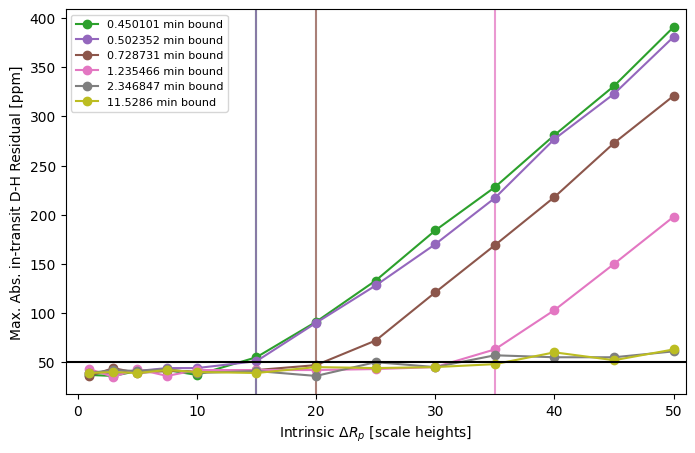

In [40]:
fig, ax = plt.subplots(figsize=(8,5))

#ax.axvline(satRps[0], c='tab:blue', alpha=0.3)
#ax.axvline(satRps[1], c='tab:orange', alpha=0.3)
ax.axvline(satRps[2], c='tab:green', alpha=0.75)
#ax.axvline(satRps[3], c='tab:red', alpha=0.3)
ax.axvline(satRps[4], c='tab:purple', alpha=0.75)
ax.axvline(satRps[5], c='tab:brown', alpha=0.75)
ax.axvline(satRps[6], c='tab:pink', alpha=0.75)
ax.axvline(satRps[7], c='tab:gray', alpha=0.75)
ax.axvline(satRps[8], c='tab:olive', alpha=0.75)

#ax.plot(fasym, N1_ITR, marker='o', c='tab:blue', label=str(N1_bound)+' min bound')
#ax.plot(fasym, N25_ITR, marker='o', c='tab:orange', label=str(N25_bound)+' min bound')
ax.plot(fasym, N50_ITR, marker='o', c='tab:green', label=str(N50_bound)+' min bound')
#ax.plot(fasym, N100_ITR, marker='o', c='tab:red', label=str(N100_bound)+' min bound')
ax.plot(fasym, N200_ITR, marker='o', c='tab:purple', label=str(N200_bound)+' min bound')
ax.plot(fasym, N500_ITR, marker='o', c='tab:brown', label=str(N500_bound)+' min bound')
ax.plot(fasym, N1k_ITR, marker='o', c='tab:pink', label=str(N1k_bound)+' min bound')
ax.plot(fasym, N2k_ITR, marker='o', c='tab:gray', label=str(N2k_bound)+' min bound')
ax.plot(fasym, N10k_ITR, marker='o', c='tab:olive', label=str(N10k_bound)+' min bound')
ax.axhline(50., c='black')
ax.set(xlim=(-1, 51))
ax.set(xlabel=r'Intrinsic $\Delta R_p$ [scale heights]', ylabel=r'Max. Abs. in-transit D-H Residual [ppm]')
ax.legend(loc='upper left', fontsize=8)
plt.show()

Vertical lines = the corresponding $\Delta R_p$ at which that line family's $\Delta t_0$ hit the bound.

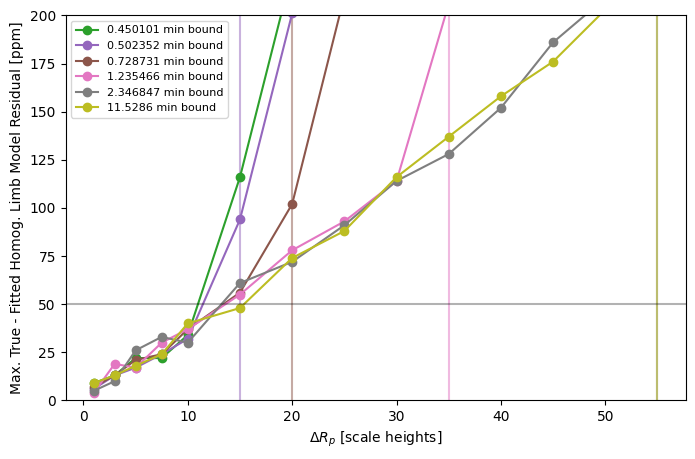

In [44]:
fig, ax = plt.subplots(figsize=(8,5))

#ax.axvline(satRps[0], c='tab:blue', alpha=0.3)
#ax.axvline(satRps[1], c='tab:orange', alpha=0.3)
#ax.axvline(satRps[2], c='tab:green', alpha=0.5)
#ax.axvline(satRps[3], c='tab:red', alpha=0.3)
ax.axvline(satRps[4], c='tab:purple', alpha=0.5)
ax.axvline(satRps[5], c='tab:brown', alpha=0.5)
ax.axvline(satRps[6], c='tab:pink', alpha=0.5)
ax.axvline(satRps[7], c='tab:gray', alpha=0.5)
ax.axvline(satRps[8], c='tab:olive', alpha=0.5)

#ax.plot(fasym, N1_MMR, marker='o', c='tab:blue', label=str(N1_bound)+' min bound')
#ax.plot(fasym, N25_MMR, marker='o', c='tab:orange', label=str(N25_bound)+' min bound')
ax.plot(fasym, N50_MMR, marker='o', c='tab:green', label=str(N50_bound)+' min bound')
#ax.plot(fasym, N100_MMR, marker='o', c='tab:red', label=str(N100_bound)+' min bound')
ax.plot(fasym, N200_MMR, marker='o', c='tab:purple', label=str(N200_bound)+' min bound')
ax.plot(fasym, N500_MMR, marker='o', c='tab:brown', label=str(N500_bound)+' min bound')
ax.plot(fasym, N1k_MMR, marker='o', c='tab:pink', label=str(N1k_bound)+' min bound')
ax.plot(fasym, N2k_MMR, marker='o', c='tab:gray', label=str(N2k_bound)+' min bound')
ax.plot(fasym, N10k_MMR, marker='o', c='tab:olive', label=str(N10k_bound)+' min bound')
ax.axhline(50., c='black', alpha=0.3)
ax.set(ylim=(0,200))
ax.set(xlabel=r'$\Delta R_p$ [scale heights]', ylabel=r'Max. True - Fitted Homog. Limb Model Residual [ppm]')
ax.legend(loc='upper left', fontsize=8)
plt.show()

Again, vertical lines = the corresponding $\Delta R_p$ at which that line family's $\Delta t_0$ hit the bound.

In [45]:
# fig, ax = plt.subplots(figsize=(8,8), nrows=2)
# ax0, ax1 = ax[0], ax[1]
# # ax0.plot(fasym, N1_ITR, marker='o', label=str(N1_bound)+' min bound')
# # ax0.plot(fasym, N25_ITR, marker='o', label=str(N25_bound)+' min bound')
# # ax0.plot(fasym, N50_ITR, marker='o', label=str(N50_bound)+' min bound')
# # ax0.plot(fasym, N100_ITR, marker='o', label=str(N100_bound)+' min bound')
# ax0.plot(fasym, N200_ITR, marker='o', label=str(N200_bound)+' min bound')
# ax0.plot(fasym, N500_ITR, marker='o', label=str(N500_bound)+' min bound')
# ax0.plot(fasym, N1k_ITR, marker='o', label=str(N1k_bound)+' min bound')
# ax0.plot(fasym, N2k_ITR, marker='o', label=str(N2k_bound)+' min bound')
# ax0.plot(fasym, N10k_ITR, marker='o', label=str(N10k_bound)+' min bound')
# ax0.axhline(50., c='black')
# ax0.set(ylim=(20, 100))
# ax0.set(xlabel=r'$\Delta R_p$ [scale heights]', ylabel=r'Max. Abs. I.T. D-H Residual [ppm]')
# ax0.legend(loc='upper left', fontsize=8)

# # ax1.plot(fasym, N1_MMR, marker='o', label=str(N1_bound)+' min bound')
# # ax1.plot(fasym, N25_MMR, marker='o', label=str(N25_bound)+' min bound')
# # ax1.plot(fasym, N50_MMR, marker='o', label=str(N50_bound)+' min bound')
# # ax1.plot(fasym, N100_MMR, marker='o', label=str(N100_bound)+' min bound')
# ax1.plot(fasym, N200_MMR, marker='o', label=str(N200_bound)+' min bound')
# ax1.plot(fasym, N500_MMR, marker='o', label=str(N500_bound)+' min bound')
# ax1.plot(fasym, N1k_MMR, marker='o', label=str(N1k_bound)+' min bound')
# ax1.plot(fasym, N2k_MMR, marker='o', label=str(N2k_bound)+' min bound')
# ax1.plot(fasym, N10k_MMR, marker='o', label=str(N10k_bound)+' min bound')
# ax1.axhline(50., c='black')
# ax1.set(ylim=(0,500))
# ax1.set(xlabel=r'$\Delta R_p$ [scale heights]', ylabel=r'Max. True - BF Model Residual [ppm]')
# ax1.legend(loc='upper left', fontsize=8)
# plt.show()

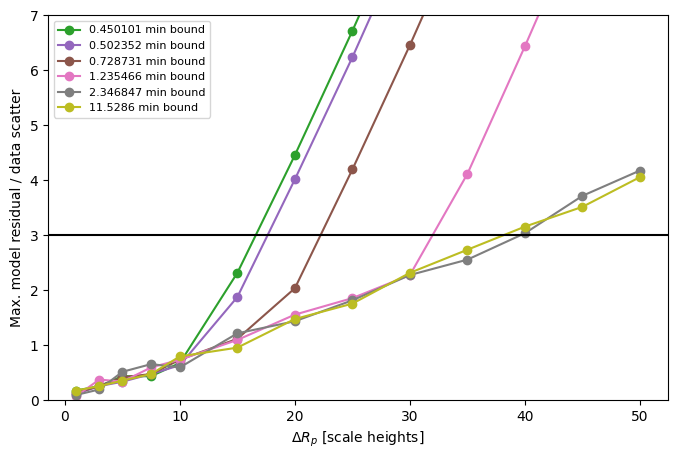

In [47]:
fig, ax = plt.subplots(figsize=(8,5))
#ax.plot(fasym, N1_MMR/50., marker='o', c='tab:blue', label=str(N1_bound)+' min bound')
#ax.plot(fasym, N25_MMR/50., marker='o', c='tab:orange', label=str(N25_bound)+' min bound')
ax.plot(fasym, N50_MMR/50., marker='o', c='tab:green', label=str(N50_bound)+' min bound')
#ax.plot(fasym, N100_MMR/50., marker='o', c='tab:red', label=str(N100_bound)+' min bound')
ax.plot(fasym, N200_MMR/50., marker='o', c='tab:purple', label=str(N200_bound)+' min bound')
ax.plot(fasym, N500_MMR/50., marker='o', c='tab:brown', label=str(N500_bound)+' min bound')
ax.plot(fasym, N1k_MMR/50., marker='o', c='tab:pink', label=str(N1k_bound)+' min bound')
ax.plot(fasym, N2k_MMR/50., marker='o', c='tab:gray', label=str(N2k_bound)+' min bound')
ax.plot(fasym, N10k_MMR/50., marker='o', c='tab:olive', label=str(N10k_bound)+' min bound')
ax.axhline(3., c='black')
ax.set(ylim=(0,7))
ax.set(xlabel=r'$\Delta R_p$ [scale heights]', ylabel=r'Max. model residual / data scatter')
ax.legend(loc='upper left', fontsize=8)
plt.show()

In [48]:
# take above curves, create an interpolator to determine x where y=3
# then plot intersections vs. f_asym
# interpolate using x = y of above, y = x of above
# that way I can input my desired y value
desired_sigma = 3.0
xsigs = np.array([])
infunc_N1 = interp1d(x=(N1_MMR/50.), y=fasym, kind='linear')
xsig_N1 = infunc_N1.__call__(desired_sigma)
xsigs = np.append(xsigs, xsig_N1)
infunc_N25 = interp1d(x=(N25_MMR/50.), y=fasym, kind='linear')
xsig_N25 = infunc_N25.__call__(desired_sigma)
xsigs = np.append(xsigs, xsig_N25)
infunc_N50 = interp1d(x=(N50_MMR/50.), y=fasym, kind='linear')
xsig_N50 = infunc_N50.__call__(desired_sigma)
xsigs = np.append(xsigs, xsig_N50)
infunc_N100 = interp1d(x=(N100_MMR/50.), y=fasym, kind='linear')
xsig_N100 = infunc_N100.__call__(desired_sigma)
xsigs = np.append(xsigs, xsig_N100)
infunc_N200 = interp1d(x=(N200_MMR/50.), y=fasym, kind='linear')
xsig_N200 = infunc_N200.__call__(desired_sigma)
xsigs = np.append(xsigs, xsig_N200)
infunc_N500 = interp1d(x=(N500_MMR/50.), y=fasym, kind='linear')
xsig_N500 = infunc_N500.__call__(desired_sigma)
xsigs = np.append(xsigs, xsig_N500)
infunc_N1k = interp1d(x=(N1k_MMR/50.), y=fasym, kind='linear')
xsig_N1k = infunc_N1k.__call__(desired_sigma)
xsigs = np.append(xsigs, xsig_N1k)
infunc_N2k = interp1d(x=(N2k_MMR/50.), y=fasym, kind='linear')
xsig_N2k = infunc_N2k.__call__(desired_sigma)
xsigs = np.append(xsigs, xsig_N2k)
infunc_N10k = interp1d(x=(N10k_MMR/50.), y=fasym, kind='linear')
xsig_N10k = infunc_N10k.__call__(desired_sigma)
xsigs = np.append(xsigs, xsig_N10k)


In [61]:
# attempting to fit the law
# fitting only t0_var <= 4, since it might plateu after this
idxs_tofit = np.where(bounds <= 5.)[0]
x_tofit, y_tofit = bounds[idxs_tofit], xsigs[idxs_tofit]

def exp_function(x, a, b):
    # fits y = a*exp(-x) + b
    y = a*np.exp(-x) + b
    return y

a_fitval, b_fitval = curve_fit(f=exp_function, xdata=x_tofit, ydata=y_tofit, p0=[-50, 50])[0]
x_fit = np.linspace(x_tofit[0], 5., 100)
y_fit = exp_function(x_fit, a_fitval, b_fitval)

In [65]:
# function to convert scale heights to km for this planet's example
# in order to make secondary y-axis
def H_to_km(H):
    return H*570.

def km_to_H(km):
    return km/570.

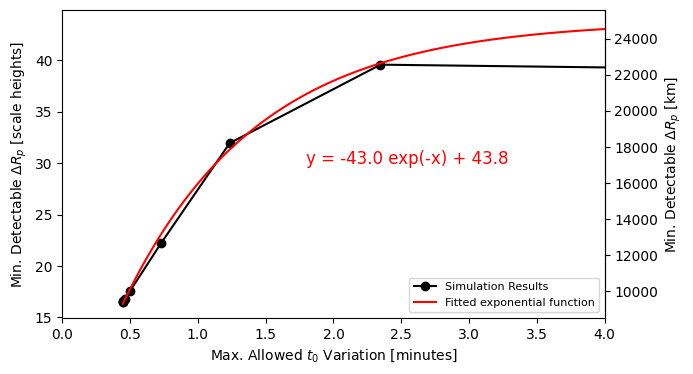

In [67]:
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(bounds, xsigs, marker='o', c='black', label='Simulation Results')
ax.plot(x_fit, y_fit, c='red', label='Fitted exponential function')
ax.text(0.45, 0.5, 'y = %.1f exp(-x) + %.1f'%(a_fitval, b_fitval), c='red', fontsize=12, transform=ax.transAxes)

ax.set(xlim=(0,4))
ax.set(xlabel=r'Max. Allowed $t_0$ Variation [minutes]', ylabel=r'Min. Detectable $\Delta R_p$ [scale heights]')

secy = ax.secondary_yaxis('right', functions=(H_to_km, km_to_H))
secy.set_ylabel(r'Min. Detectable $\Delta R_p$ [km]')

ax.legend(loc='lower right', fontsize=8)
plt.show()

Note: The maximum allowed $\Delta t_0$ is NOT always equal to the actual best fit $\Delta t_0$ to mimic that $\Delta R_p$.